In [1]:
import argparse
import os
import torch
from model_da import GIN


class ARGS():
    def __init__(self):
        self.n_domains = 2
        self.n_data_points = 10000
        self.n_epochs = 80
        self.epochs_per_line = 5
        self.lr = 0.01
        self.lr_schedule = [50]
        self.batch_size = 1000
        self.incompressible_flow = 1
        self.empirical_vars = 1
        self.init_identity = 1
        self.dim_s = 2
        self.dim_c = 2
        self.dataset = 'synthetic'
        self.load_existing_dataset = None
        self.save_frequency = 80
        self.mcc_frequency = 10
        
        
        
args = ARGS()

timestamp = '1680678529'
model_fname = '/home/guanglinzhou/code/cgm/GIN/domain_adaptation_synthetic_save/{}/model_save/080.pt'.format(timestamp)
load_existing_dataset = '/home/guanglinzhou/code/cgm/GIN/domain_adaptation_synthetic_save/{}/data'.format(timestamp)


# Load the saved model onto the CPU
loaded_model_dict = torch.load(model_fname, map_location=torch.device('cpu'))
loaded_model = GIN(args)
loaded_model.load_state_dict(loaded_model_dict['model'])



ReversibleGraphNet(
  (module_list): ModuleList(
    (0): GINCouplingBlock(
      (subnet1): Sequential(
        (0): Linear(in_features=5, out_features=10, bias=True)
        (1): ReLU()
        (2): Linear(in_features=10, out_features=10, bias=True)
        (3): ReLU()
        (4): Linear(in_features=10, out_features=10, bias=True)
      )
      (subnet2): Sequential(
        (0): Linear(in_features=5, out_features=10, bias=True)
        (1): ReLU()
        (2): Linear(in_features=10, out_features=10, bias=True)
        (3): ReLU()
        (4): Linear(in_features=10, out_features=10, bias=True)
      )
    )
    (1): PermuteRandom()
    (2): GINCouplingBlock(
      (subnet1): Sequential(
        (0): Linear(in_features=5, out_features=10, bias=True)
        (1): ReLU()
        (2): Linear(in_features=10, out_features=10, bias=True)
        (3): ReLU()
        (4): Linear(in_features=10, out_features=10, bias=True)
      )
      (subnet2): Sequential(
        (0): Linear(in_features=5

<All keys matched successfully>

In [2]:
latent = torch.load(os.path.join(
    load_existing_dataset, 'latent.pt'))
data = torch.load(os.path.join(
    load_existing_dataset, 'data.pt'))
target = torch.load(os.path.join(
    load_existing_dataset, 'labels.pt'))


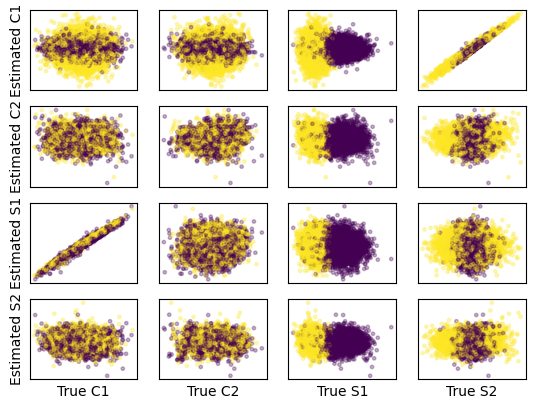

In [4]:
import numpy as np
import matplotlib.pyplot as plt
loaded_model.eval()
loaded_model.cpu()
z_reconstructed = (loaded_model(data)[0]).detach()
sig = torch.stack([z_reconstructed[target == i].std(
    0, unbiased=False) for i in range(loaded_model.n_domains)])
rms_sig = np.sqrt(np.mean(sig.numpy()**2, 0))
latent_sig = torch.stack([latent[target == i].std(
    0, unbiased=False) for i in range(loaded_model.n_domains)])
latent_rms_sig = np.sqrt(np.mean(latent_sig.numpy()**2, 0))
# in da_synthetic experiments, we set dim_c=2 and dim_s=2 in default, which is consistent with the experiment in 'Partial Identiﬁability for Domain Adaptation'
# in this synthetic experiment, we could tell the estimated C_1 and C_2, so we'll plot all the permutation.
# first plot with 4*4 subplots, similar to Figure 3 in 'Partial Identiﬁability for Domain Adaptation'
# fig = plt.figure(figsize=(12, 3.5))
fig, axs = plt.subplots(4, 4)
dim_c_1 = np.flip(np.argsort(rms_sig))[0]
estimated_c_1 = z_reconstructed[:, dim_c_1]
dim_c_2 = np.flip(np.argsort(rms_sig))[1]
estimated_c_2 = z_reconstructed[:, dim_c_2]
dim_s_1 = np.flip(np.argsort(rms_sig))[2]
estimated_s_1 = z_reconstructed[:, dim_s_1]
dim_s_2 = np.flip(np.argsort(rms_sig))[3]
estimated_s_2 = z_reconstructed[:, dim_s_2]

true_s_1 = latent[:, 0]
true_s_2 = latent[:, 1]
true_c_1 = latent[:, 2]
true_c_2 = latent[:, 3]
# dim_s_length = load_model.dim_s

# top first row
# x-axis is True C1, y-axis is Estimated C1
axs[0, 0].scatter(true_c_1, estimated_c_1,
            c=target, s=6, alpha=0.3)
axs[0, 0].set_ylabel('Estimated C1')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])
# x-axis is True C2, y-axis is Estimated C1
axs[0, 1].scatter(true_c_2, estimated_c_1,
            c=target, s=6, alpha=0.3)
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])
# x-axis is True S1, y-axis is Estimated C1
axs[0, 2].scatter(true_s_1, estimated_c_1,
            c=target, s=6, alpha=0.3)
axs[0, 2].set_xticks([])
axs[0, 2].set_yticks([])
# x-axis is True S2, y-axis is Estimated C1
axs[0, 3].scatter(true_s_2, estimated_c_1,
            c=target, s=6, alpha=0.3)
axs[0, 3].set_xticks([])
axs[0, 3].set_yticks([])

# top second row
# x-axis is True C1, y-axis is Estimated C2
axs[1, 0].scatter(true_c_1, estimated_c_2,
            c=target, s=6, alpha=0.3)
axs[1, 0].set_ylabel('Estimated C2')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])
# x-axis is True C2, y-axis is Estimated C2
axs[1, 1].scatter(true_c_2, estimated_c_2,
            c=target, s=6, alpha=0.3)
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])
# x-axis is True S1, y-axis is Estimated C2
axs[1, 2].scatter(true_s_1, estimated_c_2,
            c=target, s=6, alpha=0.3)
axs[1, 2].set_xticks([])
axs[1, 2].set_yticks([])
# x-axis is True S2, y-axis is Estimated C2
axs[1, 3].scatter(true_s_2, estimated_c_2,
            c=target, s=6, alpha=0.3)
axs[1, 3].set_xticks([])
axs[1, 3].set_yticks([])

# top third row
# x-axis is True C1, y-axis is Estimated S1
axs[2, 0].scatter(true_c_1, estimated_s_1,
            c=target, s=6, alpha=0.3)
axs[2, 0].set_ylabel('Estimated S1')
axs[2, 0].set_xticks([])
axs[2, 0].set_yticks([])
# x-axis is True C2, y-axis is Estimated S1
axs[2, 1].scatter(true_c_2, estimated_s_1,
            c=target, s=6, alpha=0.3)
axs[2, 1].set_xticks([])
axs[2, 1].set_yticks([])
# x-axis is True S1, y-axis is Estimated S1
axs[2, 2].scatter(true_s_1, estimated_s_1,
            c=target, s=6, alpha=0.3)
axs[2, 2].set_xticks([])
axs[2, 2].set_yticks([])
# x-axis is True S2, y-axis is Estimated S1
axs[2, 3].scatter(true_s_2, estimated_s_1,
            c=target, s=6, alpha=0.3)
axs[2, 3].set_xticks([])
axs[2, 3].set_yticks([])

# bottom row
# x-axis is True C1, y-axis is Estimated S2
axs[3, 0].scatter(true_c_1, estimated_s_2,
            c=target, s=6, alpha=0.3)
axs[3, 0].set_ylabel('Estimated S2')
axs[3, 0].set_xlabel('True C1')
axs[3, 0].set_xticks([])
axs[3, 0].set_yticks([])
# x-axis is True C2, y-axis is Estimated S2
axs[3, 1].scatter(true_c_2, estimated_s_2,
            c=target, s=6, alpha=0.3)
axs[3, 1].set_xlabel('True C2')
axs[3, 1].set_xticks([])
axs[3, 1].set_yticks([])
# x-axis is True S1, y-axis is Estimated S2
axs[3, 2].scatter(true_s_1, estimated_s_2,
            c=target, s=6, alpha=0.3)
axs[3, 2].set_xlabel('True S1')
axs[3, 2].set_xticks([])
axs[3, 2].set_yticks([])
# x-axis is True S2, y-axis is Estimated S2
axs[3, 3].scatter(true_s_2, estimated_s_2,
            c=target, s=6, alpha=0.3)
axs[3, 3].set_xlabel('True S2')
axs[3, 3].set_xticks([])
axs[3, 3].set_yticks([])

plt.show()
# plt.close()
# fig.savefig(os.path.join(load_model.save_dir, 'figures', 'reconstruction_{}_0.png'.format(epoch)))

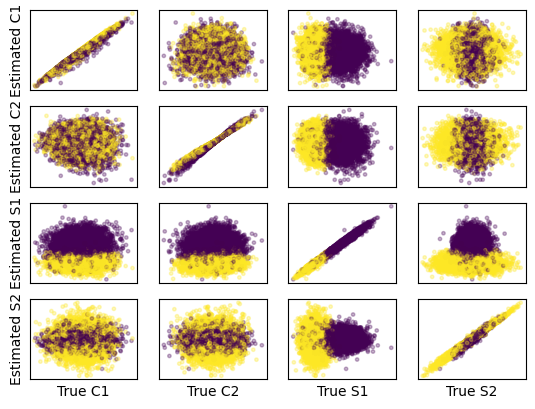

In [4]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as p3d
from time import time
import os

load_existing_dataset = '/home/guanglinzhou/code/cgm/GIN/domain_adaptation_synthetic_save/2023-0406-12-14-11/data'
estimated_z = torch.load(os.path.join(load_existing_dataset, 'estimated_z_39.pt'))
latent = torch.load(os.path.join(
    load_existing_dataset, 'latent.pt'))
target = torch.load(os.path.join(
                    load_existing_dataset, 'labels.pt'))
true_s_1 = latent[:, 0].reshape([-1,1])
true_s_2 = latent[:, 1].reshape([-1,1])
true_c_1 = latent[:, 2].reshape([-1,1])
true_c_2 = latent[:, 3].reshape([-1,1])
estimated_s_1 = estimated_z[:, 1].reshape([-1,1])
estimated_s_2 = estimated_z[:, 0].reshape([-1,1])
estimated_c_1 = estimated_z[:, 3].reshape([-1,1])
estimated_c_2 = estimated_z[:, 2].reshape([-1,1])


fig, axs = plt.subplots(4, 4)
# dim_c_1 = np.flip(np.argsort(rms_sig))[0]
# estimated_c_1 = z_reconstructed[:, dim_c_1]
# dim_c_2 = np.flip(np.argsort(rms_sig))[1]
# estimated_c_2 = z_reconstructed[:, dim_c_2]
# dim_s_1 = np.flip(np.argsort(rms_sig))[2]
# estimated_s_1 = z_reconstructed[:, dim_s_1]
# dim_s_2 = np.flip(np.argsort(rms_sig))[3]
# estimated_s_2 = z_reconstructed[:, dim_s_2]
# estimated_z = torch.cat(
#     (estimated_s_1, estimated_s_2, estimated_c_1, estimated_c_2), 1)

# true_s_1 = latent[:, 0]
# true_s_2 = latent[:, 1]
# true_c_1 = latent[:, 2]
# true_c_2 = latent[:, 3]
# dim_s_length = model.dim_s

# top first row
# x-axis is True C1, y-axis is Estimated C1
axs[0, 0].scatter(true_c_1, estimated_c_1,
                    c=target, s=6, alpha=0.3)
axs[0, 0].set_ylabel('Estimated C1')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])
# x-axis is True C2, y-axis is Estimated C1
axs[0, 1].scatter(true_c_2, estimated_c_1,
                    c=target, s=6, alpha=0.3)
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])
# x-axis is True S1, y-axis is Estimated C1
axs[0, 2].scatter(true_s_1, estimated_c_1,
                    c=target, s=6, alpha=0.3)
axs[0, 2].set_xticks([])
axs[0, 2].set_yticks([])
# x-axis is True S2, y-axis is Estimated C1
axs[0, 3].scatter(true_s_2, estimated_c_1,
                    c=target, s=6, alpha=0.3)
axs[0, 3].set_xticks([])
axs[0, 3].set_yticks([])

# top second row
# x-axis is True C1, y-axis is Estimated C2
axs[1, 0].scatter(true_c_1, estimated_c_2,
                    c=target, s=6, alpha=0.3)
axs[1, 0].set_ylabel('Estimated C2')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])
# x-axis is True C2, y-axis is Estimated C2
axs[1, 1].scatter(true_c_2, estimated_c_2,
                    c=target, s=6, alpha=0.3)
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])
# x-axis is True S1, y-axis is Estimated C2
axs[1, 2].scatter(true_s_1, estimated_c_2,
                    c=target, s=6, alpha=0.3)
axs[1, 2].set_xticks([])
axs[1, 2].set_yticks([])
# x-axis is True S2, y-axis is Estimated C2
axs[1, 3].scatter(true_s_2, estimated_c_2,
                    c=target, s=6, alpha=0.3)
axs[1, 3].set_xticks([])
axs[1, 3].set_yticks([])

# top third row
# x-axis is True C1, y-axis is Estimated S1
axs[2, 0].scatter(true_c_1, estimated_s_1,
                    c=target, s=6, alpha=0.3)
axs[2, 0].set_ylabel('Estimated S1')
axs[2, 0].set_xticks([])
axs[2, 0].set_yticks([])
# x-axis is True C2, y-axis is Estimated S1
axs[2, 1].scatter(true_c_2, estimated_s_1,
                    c=target, s=6, alpha=0.3)
axs[2, 1].set_xticks([])
axs[2, 1].set_yticks([])
# x-axis is True S1, y-axis is Estimated S1
axs[2, 2].scatter(true_s_1, estimated_s_1,
                    c=target, s=6, alpha=0.3)
axs[2, 2].set_xticks([])
axs[2, 2].set_yticks([])
# x-axis is True S2, y-axis is Estimated S1
axs[2, 3].scatter(true_s_2, estimated_s_1,
                    c=target, s=6, alpha=0.3)
axs[2, 3].set_xticks([])
axs[2, 3].set_yticks([])

# bottom row
# x-axis is True C1, y-axis is Estimated S2
axs[3, 0].scatter(true_c_1, estimated_s_2,
                    c=target, s=6, alpha=0.3)
axs[3, 0].set_ylabel('Estimated S2')
axs[3, 0].set_xlabel('True C1')
axs[3, 0].set_xticks([])
axs[3, 0].set_yticks([])
# x-axis is True C2, y-axis is Estimated S2
axs[3, 1].scatter(true_c_2, estimated_s_2,
                    c=target, s=6, alpha=0.3)
axs[3, 1].set_xlabel('True C2')
axs[3, 1].set_xticks([])
axs[3, 1].set_yticks([])
# x-axis is True S1, y-axis is Estimated S2
axs[3, 2].scatter(true_s_1, estimated_s_2,
                    c=target, s=6, alpha=0.3)
axs[3, 2].set_xlabel('True S1')
axs[3, 2].set_xticks([])
axs[3, 2].set_yticks([])
# x-axis is True S2, y-axis is Estimated S2
axs[3, 3].scatter(true_s_2, estimated_s_2,
                    c=target, s=6, alpha=0.3)
axs[3, 3].set_xlabel('True S2')
axs[3, 3].set_xticks([])
axs[3, 3].set_yticks([])

plt.show()
